<a href="https://colab.research.google.com/github/FernandoElizarraras7/SIMULACION-I/blob/main/FLECHA_Y_COJINETE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo: Flecha y cojinete
Una flecha será embonada en un cojinete como se muestra a continuación:

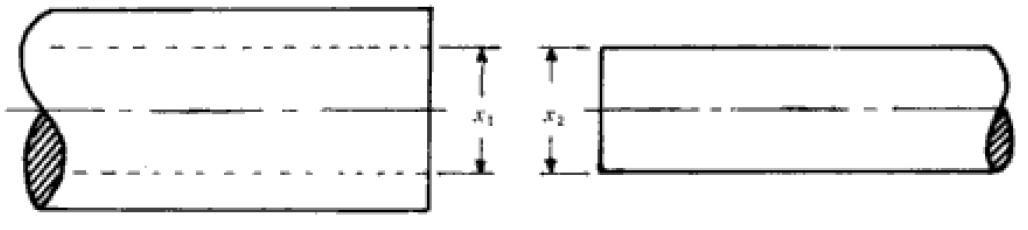

Si $x_1$ sigue una distribución normal con media 1.5 y varianza 0.0016, y $x_2$ esta misma distribución con media 1.48 y varianza 0.0009, determine:

La probabilidad de que haya interferencia.

1.   La probabilidad de que haya interferencia.
2.   El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95%

Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1.- Identifique las variables
Tenemos dos: x_1 y x_2

### 2 y 3.- Determine la distribución de probabilidad y modele las variables aleatorias
En el planteamiento ya se especifica que $x_1 \sim N(1.5, 0.04)$ y que $x_1  \sim N (1.48, 0.03)$

### 4.- Defina el modelo del sistema y los objetivos de la simulación.

La diferencia $x_1 - x_2$ modela adecuadamente el sistema.

Si $x_2 - x_1 > 0$, el diametro de la flecha es más grande que el espacio en el cojinete y, por tanto, hay interferencia. De lo contrario, las piezas embonan sin problema.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una esrimación de la probabilidad de interefrencia.

Una forma de implementarlo es mediante el siguiente código.

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm
def interferencia():                # Esta función devuelve el valor 1 si hay interferencia ó 0 si no la hay.
    interf=0
    x_1 = random.gauss(1.50,0.04)    # La función gauss genera un número que sigue una distribucion normal.
    x_2 = random.gauss(1.48,0.03)   # La media y la desviación estandar especificados.
    if 0.0 < x_2 - x_1:
        interf += 1
    return interf
interferencia()

1

### 5.- Diseñe el experimento:

Para estimar la probabilidad de interferencia, ejecutamos n veces la función anterior y calculamos de manera acumulativa la probabilidad de interferencia.

0.31990221987189194 0.06150074556385495


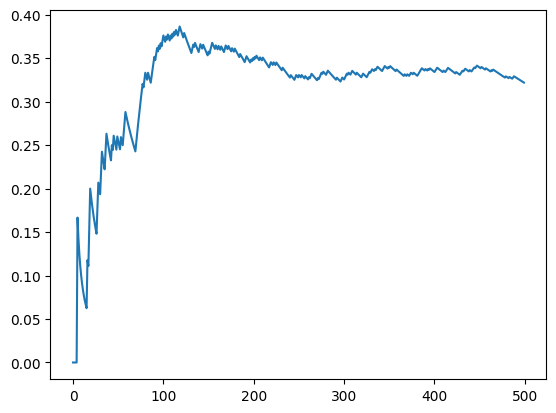

In [4]:
def prob_inter(n):
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que
    for i in range(n):              # se ha repetido la observacion mientras aumenta el numero de iteraciones.
        inter += interferencia()
        prob.append(inter/(i+1))
    return prob
X = prob_inter(500)                # Asignamos valores a n y realizamos el experimento
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos
print(np.mean(X), np.std(X))

### 6.- Repita el experimento n veces:

Una forma de hacerlo es mediante el siguiente codigo.

Media de las estimaciones: 0.34061785585759113
Desviación estándar de las estimaciones: 0.03253371967880926


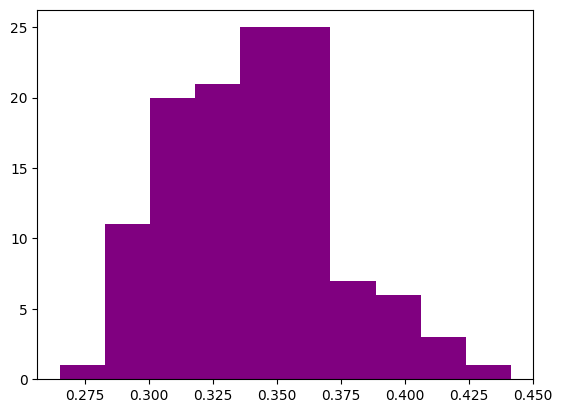

In [16]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_inter(500)
        lista.append(np.mean(s))
    return lista
Y=modelo(120)
mean_Y = np.mean(Y)
std_Y = np.std(Y)
print("Media de las estimaciones:", mean_Y)
print("Desviación estándar de las estimaciones:", std_Y)
plt.hist(Y, color = 'purple')
plt.show()

### 7.- Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [17]:
np.mean(Y)
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(0.3315999688471647, 0.3496357428680176)

### Para determinar el número de simulaciones

$$N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2$$

In [18]:
N = (2*np.std(X)*1.96/0.01)**2
print(N)

581.2097557432941


### Se puede comparar con la sulución analítica del problema.

Para ello usamos la teoría sobre la suma de variables con distribución normal.

In [19]:
norm.cdf(-0.04, -0.02, 0.05)
norm.cdf(-0.04, -0.02, 0.05)-np.mean(Y)

0.003960402532084684

## Solución Analítica
Para validar la solución analítica, consideramos las propiedades de las distribuciones normales.

#### Distribución de la Diferencia:
$$x_2 - x_1 \sim N (μ_2 - μ_1, σ_{2}^{2} + σ_{1}^{2})$$

Donde:


*   $μ_2 - μ_1=1.48-1.5=-0.02$
*   $σ_{2}^{2} + σ_{1}^{2}=(0.03)^2+(0.04)^2=0.0025$

Por lo tanto:
$$x_2 - x_1 \sim N(-0.02, 0.0025)$$

#### Cálculo de la Probabilidad de Interferencia:
$$P(x_2 - x_1<0)=P[\frac{x_2 - x_1-(-0.02)}{0.05}<\frac{0-(-0.02)}{0.05}]$$
$$P(x_2 - x_1<0)=P(Z<\frac{0.02}{0.05}=P(Z<0.4))$$

Donde $Z$ es una variable normal estándar.

#### Usando la Distribución Normal Estándar:
$$P(Z<0.4)\approx0.6554$$
Por lo tanto, la probabilidad de interferencia es aproximadamente 0.6554 ó 65.54%

## Comparación con la Solución Analítica



In [22]:
# Probabilidad analítica de interferencia
prob_analitica = norm.cdf(0.4)
print(f"Probabilidad analítica de interferencia: {prob_analitica} ó {prob_analitica*100:.2f}%")

Probabilidad analítica de interferencia: 0.6554217416103242 ó 65.54%


## Justificación del Cálculo del Intervalo de Confianza y del Número de Corridas de la Simulación

#### Intervalo de Confianza:
Usamos el intervalo de confianza del 95% basado en la media y desviación estándar de las estimaciones:
$$\bar{X}\pm Z_{α/2}\frac{σ}{\sqrt{n}}$$
Donde $Z_{α/2}=1.96$ para un nivel de confianza del 95%.
#### Número de Corridas de la Simulación:
Usamos la fórmula para estimar el tamaño de la muestra:
$$N=(\frac{2σZ_{α/2}}{E})^2$$
Donde $E$ es el error tolerado (0.01 en este caso) y $Z_{α/2}=1.96$